In [1]:
!pip install torchmetrics
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import math
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import pandas as pd
import numpy as np
from   sklearn.preprocessing   import LabelEncoder          # кодировка категорий
import pandas as pd
from torch.autograd import Variable
import numpy as np
import torch.functional as F
from   sklearn.preprocessing   import LabelEncoder          # кодировка категорий
from   sklearn.decomposition import PCA
from   sklearn import linear_model
import matplotlib.pyplot as plt                   # постороение графиков
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, TensorDataset
import torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 17.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [4]:
# Читаем файл с компетенциями
df = pd.read_excel('/content/DatasetHS_L_4_16_diff_3_COLAB.xlsx')

In [5]:
df['SKILLS'] = df['SKILLS'].astype(str)

# Длинна каждого посчитаем длинну
df['list_of_skill'] = df['SKILLS'].apply(lambda x: x.split(','))

In [6]:
df['cnt_skill'] = df['list_of_skill'].apply(lambda x: len(x))

In [7]:
df.head(5)

,SKILLS,list_of_skill,cnt_skill
0,НАВЫКИ КООРДИНАЦИИ И ОПЕРАТИВНОГО ПЛАНИРОВАНИЯ...,[НАВЫКИ КООРДИНАЦИИ И ОПЕРАТИВНОГО ПЛАНИРОВАНИ...,16
1,"1C БУХГАЛТЕРИЯ,1C ЗАРПЛАТА И КАДРЫ,БАНК КЛИЕНТ...","[1C БУХГАЛТЕРИЯ, 1C ЗАРПЛАТА И КАДРЫ, БАНК КЛИ...",16
2,"1C БУХГАЛТЕРИЯ,АТТЕСТАТ ПРОФЕССИОНАЛЬНОГО БУХГ...","[1C БУХГАЛТЕРИЯ, АТТЕСТАТ ПРОФЕССИОНАЛЬНОГО БУ...",16
3,"1C БУХГАЛТЕРИЯ,БУХГАЛТЕРСКИЙ УЧЕТ,БУХГАЛТЕРСКА...","[1C БУХГАЛТЕРИЯ, БУХГАЛТЕРСКИЙ УЧЕТ, БУХГАЛТЕР...",16
4,"1C БУХГАЛТЕРИЯ,РАБОТА С ПОСТАВЩИКАМИ,РАСЧЕТЫ С...","[1C БУХГАЛТЕРИЯ, РАБОТА С ПОСТАВЩИКАМИ, РАСЧЕТ...",16


In [8]:
df_skill = df[(df.cnt_skill > 3) & (df.cnt_skill < 17)]

In [9]:
data = df_skill

In [10]:
len(data)

110163

In [11]:
# Создаем словарь
vocabulary = []
vocabulary.append('[PAD]')
vocabulary.append('[MASK]')
for i, row  in data.iterrows():
    for j in data["list_of_skill"][i]:
        if j not in vocabulary:
            vocabulary.append(j)
word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}
vocabulary_size = len(vocabulary)

In [12]:
vocabulary_size

42006

In [13]:
from collections import Counter

# Создадим список всех слов в списке слов
all_words = [word for sublist in data.list_of_skill for word in sublist]

# Подсчитаем количество повторений каждого слова
word_counts = Counter(all_words)

# Выведем результат
print(word_counts)

Counter({'ПОЛЬЗОВАТЕЛЬ ПК': 16222, 'РАБОТА С БОЛЬШИМ ОБЪЕМОМ ИНФОРМАЦИИ': 9014, 'АНГЛИЙСКИЙ ЯЗЫК': 8409, 'АКТИВНЫЕ ПРОДАЖИ': 6862, '1С ПРЕДПРИЯТИЕ 8': 6535, 'ЗАКЛЮЧЕНИЕ ДОГОВОРОВ': 5800, 'ПОИСК И ПРИВЛЕЧЕНИЕ КЛИЕНТОВ': 5278, 'УПРАВЛЕНИЕ ПРОЕКТАМИ': 4802, 'AUTOCAD': 4777, 'MS POWERPOINT': 4182, 'SQL': 4028, 'ВЕДЕНИЕ ОТЧЕТНОСТИ': 3607, 'EXCEL': 3544, 'ADOBE PHOTOSHOP': 3506, 'B2B ПРОДАЖИ': 3467, 'ПОИСК ИНФОРМАЦИИ В ИНТЕРНЕТ': 3363, 'GIT': 3362, 'ВЫСШЕЕ ОБРАЗОВАНИЕ': 3265, 'РАБОТА С ОРГТЕХНИКОЙ': 3191, 'CRM': 3081, 'LINUX': 3080, 'ДОКУМЕНТООБОРОТ': 3060, 'ОТВЕТСТВЕННОСТЬ И ПУНКТУАЛЬНОСТЬ': 2879, 'УВЕРЕННЫЙ ПОЛЬЗОВАТЕЛЬ ПК': 2875, 'ОПЫТНЫЙ ПОЛЬЗОВАТЕЛЬ ПК': 2838, 'ДОКУМЕНТАЛЬНОЕ СОПРОВОЖДЕНИЕ': 2838, 'БУХГАЛТЕРСКАЯ ОТЧЕТНОСТЬ': 2724, 'ХОЛОДНЫЕ ПРОДАЖИ': 2702, '1С БУХГАЛТЕРИЯ': 2675, 'ПЕРВИЧНАЯ ДОКУМЕНТАЦИЯ': 2642, 'MS OUTLOOK': 2615, '1С ДОКУМЕНТООБОРОТ': 2602, 'УПРАВЛЕНИЕ ПРОДАЖАМИ': 2592, 'ПЕРВИЧНАЯ БУХГАЛТЕРСКАЯ ДОКУМЕНТАЦИЯ': 2581, 'MS EXCEL': 2580, 'ВЕДЕНИЕ КЛИЕНТСКОЙ БАЗЫ': 2571, 'КО

In [14]:
from collections import Counter

# Создадим список всех слов в списке слов
all_words = [word for sublist in data.list_of_skill for word in sublist]

# Подсчитаем количество повторений каждого слова
word_counts = Counter(all_words)

# Получим список слов, которые встречаются всего один раз
unique_words = [word for word, count in word_counts.items() if count == 1]

# Выведем результат
print(unique_words)

['НАВЫКИ КООРДИНАЦИИ И ОПЕРАТИВНОГО ПЛАНИРОВАНИЯ ДЕЯТЕЛЬНОСТИ', 'УМЕНИЕ ВЗАИМОДЕЙСТВОВАТЬ С ВЫСШИМ РУКОВОДСТВОМ', 'УМЕНИЕ ПРИНИМАТЬ РЕШЕНИЯ И ДОВОДИТЬ ИХ ДО ИСПОЛНЕНИЯ', 'ЗНАНИЯ КОНСТРУКЦИИ И УСТРОЙСТВА ЛОКОМОТИВОВ СЕРИИ ТЭМ18ДМ', 'ТЭМ7А', 'ЭП2К', 'ЧС 2', 'УМЕНИЕ ПОЛЬЗОВАТЬСЯ ПРОГРАММАМИ КАСАНТ', 'КАСАТ', 'АСУТ Т', 'АС РБ', 'XL 1С', 'НАВЫКИ РАБОТЫ С INTERNET И ЭЛЕКТРОННОЙ ПОЧТОЙ', 'ПРОДВИЖЕНИЕ БРЕНДА КОМПАНИИ', 'ДОРАБОТКА САЙТА КОМПАНИИ', 'РАБОТА С АНАЛИТИКОЙ', 'РИВЛЕЧЕНИЕ ЦЕЛЕВОЙ АУДИТОРИИ', 'УПРАВЛЕНИЕ РЕПУТАЦИЕЙ БРЕНДА', 'РАЗРАБОТКА МЕТОДОЛОГИИ БИЗНЕС ПРОЦЕССОВ', 'TELEGRAMM', '1С УТ10', '1С УТ11', 'KA 1C', '1C БП', 'ПРОГРАММЫ МICROSOFT', 'УДОСТОВЕРЕНИЕ С ПРАВОМ ИСПЫТАНИЯ ОБОРУДОВАНИЯ ПОВЫШЕННЫМ НАПРЯЖЕНИЕМ', 'ЭКСПЛУАТАЦИОННЫЕ ИСПЫТАНИЯ', '500 КВ', 'ЭЛЕКТРОУСТАНОВКИ 6 500 КВ', 'ЭЛЕКТРОСЕТИ', 'ПРОВЕДЕНИЕ ИСПЫТАНИЙ И ИЗМЕРЕНИЙ', 'МОСЭНЕРГО', 'МОСИНЖПРОЕКТ', '220КВ', '110КВ', 'IP АТС', 'REMOTE DESKTOP SERVICE', 'ОРГАНИЗАЦИЯ ВИДЕО КОНФЕРЕНЦСВЯЗИ', 'PIX4D MAPPER', 'CREDO 3D СКАН', 'ОБРАБО

In [15]:
len(unique_words)

28966

In [16]:
## Преобразуйте объект Counter в DataFrame
#word_count_df = pd.DataFrame(list(word_counts.items()), columns=['Skill', 'Count'])

In [17]:
#word_count_df.to_excel('word_count_df.xlsx')

In [18]:
# Случайная сортировка списков
for index, row in data.iterrows():
    random.shuffle(row['list_of_skill'])

In [19]:
len_tokens = 16

In [20]:
data['list_of_skill'] = data['list_of_skill'].apply(lambda x: x + ['[PAD]' for _ in range(len_tokens - len(x))])

In [21]:
data['target']= data['list_of_skill'].apply(lambda x: x[0])

In [22]:
data['seq'] = data['list_of_skill'].apply(lambda x: ['[MASK]'] + x[1:] if len(x) > 0 else [])

In [23]:
data

,SKILLS,list_of_skill,cnt_skill,target,seq
0,НАВЫКИ КООРДИНАЦИИ И ОПЕРАТИВНОГО ПЛАНИРОВАНИЯ...,"[XL 1С, НАВЫКИ РАБОТЫ С INTERNET И ЭЛЕКТРОННОЙ...",16,XL 1С,"[[MASK], НАВЫКИ РАБОТЫ С INTERNET И ЭЛЕКТРОННО..."
1,"1C БУХГАЛТЕРИЯ,1C ЗАРПЛАТА И КАДРЫ,БАНК КЛИЕНТ...","[КАДРОВОЕ ДЕЛОПРОИЗВОДСТВО, 1C ЗАРПЛАТА И КАДР...",16,КАДРОВОЕ ДЕЛОПРОИЗВОДСТВО,"[[MASK], 1C ЗАРПЛАТА И КАДРЫ, РАСЧЕТ ЗАРАБОТНО..."
2,"1C БУХГАЛТЕРИЯ,АТТЕСТАТ ПРОФЕССИОНАЛЬНОГО БУХГ...","[ГОДОВОЙ БАЛАНС, РАСЧЕТ ЗАРАБОТНОЙ ПЛАТЫ, 1C Б...",16,ГОДОВОЙ БАЛАНС,"[[MASK], РАСЧЕТ ЗАРАБОТНОЙ ПЛАТЫ, 1C БУХГАЛТЕР..."
3,"1C БУХГАЛТЕРИЯ,БУХГАЛТЕРСКИЙ УЧЕТ,БУХГАЛТЕРСКА...","[1C БУХГАЛТЕРИЯ, ПОЛЬЗОВАТЕЛЬ ПК, ОПРИХОДОВАНИ...",16,1C БУХГАЛТЕРИЯ,"[[MASK], ПОЛЬЗОВАТЕЛЬ ПК, ОПРИХОДОВАНИЕ ТОВАРА..."
4,"1C БУХГАЛТЕРИЯ,РАБОТА С ПОСТАВЩИКАМИ,РАСЧЕТЫ С...","[ОТЧЕТНОСТЬ В ФСС, РАСЧЕТ ЗАРАБОТНОЙ ПЛАТЫ, БУ...",16,ОТЧЕТНОСТЬ В ФСС,"[[MASK], РАСЧЕТ ЗАРАБОТНОЙ ПЛАТЫ, БУХГАЛТЕРСКА..."
...,...,...,...,...,...
110158,"ЭНЕРГЕТИКА,ЭЛЕКТРОЭНЕРГЕТИКА,АСУ,РАБОТА С ПРОЕ...","[ЭНЕРГЕТИКА, РАБОТА С ПРОЕКТНОЙ ДОКУМЕНТАЦИЕЙ,...",4,ЭНЕРГЕТИКА,"[[MASK], РАБОТА С ПРОЕКТНОЙ ДОКУМЕНТАЦИЕЙ, ЭЛЕ..."
110159,"ЭНЕРГИЧНОСТЬ,УМЕНИЕ ВНИМАТЕЛЬНО ЧИТАТЬ,РАБОТА ...","[УМЕНИЕ ВНИМАТЕЛЬНО ЧИТАТЬ, ЭНЕРГИЧНОСТЬ, РАБО...",4,УМЕНИЕ ВНИМАТЕЛЬНО ЧИТАТЬ,"[[MASK], ЭНЕРГИЧНОСТЬ, РАБОТА НА IPHONE И ПК, ..."
110160,"ЮРИДИЧЕСКОЕ СОПРОВОЖДЕНИЕ,НАВЫКИ ВЕДЕНИЯ ПРЕТЕ...","[НАВЫКИ ВЕДЕНИЯ ПРЕТЕНЗИОННО ИСКОВОЙ РАБОТЫ, С...",4,НАВЫКИ ВЕДЕНИЯ ПРЕТЕНЗИОННО ИСКОВОЙ РАБОТЫ,"[[MASK], СУДЕБНЫЕ РАЗБИРАТЕЛЬСТВА, ЮРИДИЧЕСКОЕ..."
110161,"ЮРИДИЧЕСКОЕ СОПРОВОЖДЕНИЕ,РОЗНИЧНАЯ ТОРГОВЛЯ,К...","[ЮРИДИЧЕСКОЕ СОПРОВОЖДЕНИЕ, КОНСУЛЬТАНТ ПЛЮС, ...",4,ЮРИДИЧЕСКОЕ СОПРОВОЖДЕНИЕ,"[[MASK], КОНСУЛЬТАНТ ПЛЮС, РОЗНИЧНАЯ ТОРГОВЛЯ,..."


In [24]:
#Сортировка полей skills_id в датасете
#data['skills_id_sort'] = data['skills_id'].apply(sorted)

In [25]:
#data.to_excel('data_sort.xlsx')

In [26]:
def tokenize_dataset(data):
    # Создание нового столбца со всеми токенизированными элементами
    data['target_id'] = data['target'].apply(lambda x:  word2idx[x])
    data['skills_id'] = data['seq'].apply(lambda x: [word2idx[word] for word in x])
    return data

In [27]:
data = tokenize_dataset(data)

In [28]:
#data.to_excel('data.xlsx')

In [29]:
data

,SKILLS,list_of_skill,cnt_skill,target,seq,target_id,skills_id
0,НАВЫКИ КООРДИНАЦИИ И ОПЕРАТИВНОГО ПЛАНИРОВАНИЯ...,"[XL 1С, НАВЫКИ РАБОТЫ С INTERNET И ЭЛЕКТРОННОЙ...",16,XL 1С,"[[MASK], НАВЫКИ РАБОТЫ С INTERNET И ЭЛЕКТРОННО...",16,"[1, 17, 15, 14, 13, 12, 9, 11, 5, 2, 4, 8, 10,..."
1,"1C БУХГАЛТЕРИЯ,1C ЗАРПЛАТА И КАДРЫ,БАНК КЛИЕНТ...","[КАДРОВОЕ ДЕЛОПРОИЗВОДСТВО, 1C ЗАРПЛАТА И КАДР...",16,КАДРОВОЕ ДЕЛОПРОИЗВОДСТВО,"[[MASK], 1C ЗАРПЛАТА И КАДРЫ, РАСЧЕТ ЗАРАБОТНО...",25,"[1, 19, 29, 24, 32, 28, 30, 26, 23, 22, 31, 18..."
2,"1C БУХГАЛТЕРИЯ,АТТЕСТАТ ПРОФЕССИОНАЛЬНОГО БУХГ...","[ГОДОВОЙ БАЛАНС, РАСЧЕТ ЗАРАБОТНОЙ ПЛАТЫ, 1C Б...",16,ГОДОВОЙ БАЛАНС,"[[MASK], РАСЧЕТ ЗАРАБОТНОЙ ПЛАТЫ, 1C БУХГАЛТЕР...",36,"[1, 29, 18, 38, 39, 40, 32, 34, 35, 41, 33, 37..."
3,"1C БУХГАЛТЕРИЯ,БУХГАЛТЕРСКИЙ УЧЕТ,БУХГАЛТЕРСКА...","[1C БУХГАЛТЕРИЯ, ПОЛЬЗОВАТЕЛЬ ПК, ОПРИХОДОВАНИ...",16,1C БУХГАЛТЕРИЯ,"[[MASK], ПОЛЬЗОВАТЕЛЬ ПК, ОПРИХОДОВАНИЕ ТОВАРА...",18,"[1, 26, 46, 45, 20, 25, 22, 29, 31, 43, 48, 23..."
4,"1C БУХГАЛТЕРИЯ,РАБОТА С ПОСТАВЩИКАМИ,РАСЧЕТЫ С...","[ОТЧЕТНОСТЬ В ФСС, РАСЧЕТ ЗАРАБОТНОЙ ПЛАТЫ, БУ...",16,ОТЧЕТНОСТЬ В ФСС,"[[MASK], РАСЧЕТ ЗАРАБОТНОЙ ПЛАТЫ, БУХГАЛТЕРСКА...",37,"[1, 29, 23, 18, 41, 32, 31, 36, 51, 20, 42, 26..."
...,...,...,...,...,...,...,...
110158,"ЭНЕРГЕТИКА,ЭЛЕКТРОЭНЕРГЕТИКА,АСУ,РАБОТА С ПРОЕ...","[ЭНЕРГЕТИКА, РАБОТА С ПРОЕКТНОЙ ДОКУМЕНТАЦИЕЙ,...",4,ЭНЕРГЕТИКА,"[[MASK], РАБОТА С ПРОЕКТНОЙ ДОКУМЕНТАЦИЕЙ, ЭЛЕ...",767,"[1, 752, 5814, 3060, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
110159,"ЭНЕРГИЧНОСТЬ,УМЕНИЕ ВНИМАТЕЛЬНО ЧИТАТЬ,РАБОТА ...","[УМЕНИЕ ВНИМАТЕЛЬНО ЧИТАТЬ, ЭНЕРГИЧНОСТЬ, РАБО...",4,УМЕНИЕ ВНИМАТЕЛЬНО ЧИТАТЬ,"[[MASK], ЭНЕРГИЧНОСТЬ, РАБОТА НА IPHONE И ПК, ...",42004,"[1, 5058, 42005, 7609, 0, 0, 0, 0, 0, 0, 0, 0,..."
110160,"ЮРИДИЧЕСКОЕ СОПРОВОЖДЕНИЕ,НАВЫКИ ВЕДЕНИЯ ПРЕТЕ...","[НАВЫКИ ВЕДЕНИЯ ПРЕТЕНЗИОННО ИСКОВОЙ РАБОТЫ, С...",4,НАВЫКИ ВЕДЕНИЯ ПРЕТЕНЗИОННО ИСКОВОЙ РАБОТЫ,"[[MASK], СУДЕБНЫЕ РАЗБИРАТЕЛЬСТВА, ЮРИДИЧЕСКОЕ...",7835,"[1, 3591, 2920, 5580, 0, 0, 0, 0, 0, 0, 0, 0, ..."
110161,"ЮРИДИЧЕСКОЕ СОПРОВОЖДЕНИЕ,РОЗНИЧНАЯ ТОРГОВЛЯ,К...","[ЮРИДИЧЕСКОЕ СОПРОВОЖДЕНИЕ, КОНСУЛЬТАНТ ПЛЮС, ...",4,ЮРИДИЧЕСКОЕ СОПРОВОЖДЕНИЕ,"[[MASK], КОНСУЛЬТАНТ ПЛЮС, РОЗНИЧНАЯ ТОРГОВЛЯ,...",2920,"[1, 21, 204, 23882, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [30]:
data.reset_index(drop=True, inplace=True)

In [31]:
#data.drop_duplicates(subset='skills_id_sort', inplace=True)

In [32]:
# Assuming data is your pandas DataFrame
dataset = TensorDataset(torch.tensor(data['skills_id']), torch.tensor(data['target_id']))

In [33]:
from torch.utils.data import TensorDataset, random_split


# 95% - train, на 5% Валидируемся.
train_size = int(0.95 * len(dataset))
val_size = len(dataset) - train_size

# Разобьем на training и validation случайным образом.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

104,654 training samples
5,509 validation samples


In [34]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Зададим размер батча для DataLoaders
batch_size = 512

# Создадим DataLoaders для training and validation.
# Примеры для train берем случайным образом.
train_dataloader = DataLoader(
            train_dataset,  # Обучающие примеры.
            sampler = RandomSampler(train_dataset), # Выбор батча случайно.
            batch_size = batch_size # Обучаем с заданным размером батча.
        )

# Для проверки порядок значения не имеет поэтому можно прочитать последовательно.
validation_dataloader = DataLoader(
            val_dataset, # Валидационные примеры.
            sampler = SequentialSampler(val_dataset), # Подаем батчи последовательно.
            batch_size = batch_size # Валидируем с заданным размером батча.
        )

In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [36]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        self.W_q = nn.Linear(d_model, d_model, bias=False)
        self.W_k = nn.Linear(d_model, d_model, bias=False)
        self.W_v = nn.Linear(d_model, d_model, bias=False)
        self.W_o = nn.Linear(d_model, d_model, bias=False)

    def scaled_dot_product_attention(self, Q, K, V, mask ):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = torch.softmax(attn_scores, dim=-1)
        #Зануление весов "снизу" там где софтмакс равномерен
        attn_probs = attn_probs.masked_fill(mask.transpose(-2, -1)==False, 0.0)

        output = torch.matmul(attn_probs, V)
        return output

    def split_heads(self, x):
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)

    def combine_heads(self, x):
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)

    def forward(self, Q, K, V, mask ):
        Q = self.split_heads(self.W_q(Q.to(device)))
        K = self.split_heads(self.W_k(K.to(device)))
        V = self.split_heads(self.W_v(V.to(device)))

        attn_output = self.scaled_dot_product_attention(Q, K, V, mask.to(device))
        output = self.W_o(self.combine_heads(attn_output))
        return output

In [37]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.norm1 = nn.BatchNorm1d(len_tokens, affine=False)
        self.norm2 = nn.BatchNorm1d(len_tokens, affine=False)
        self.dropout = nn.Dropout(dropout)
        self.multihead_attention = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, d_model),
            nn.BatchNorm1d(len_tokens)
        )

    def forward(self, src_embedded, src_mask):
        src_embedded_normalized = self.norm1(src_embedded.to(device))
        src_attention_output = self.multihead_attention(src_embedded_normalized, src_embedded_normalized, src_embedded_normalized, src_mask)

        src_attention_output = src_attention_output + src_embedded
        src_attention_output_normalized = self.norm2(src_attention_output)

        src_ff_output = self.feed_forward(src_attention_output_normalized)
        src_ff_output = self.dropout(src_ff_output)

        src_output = src_attention_output + src_ff_output
        return src_output

In [38]:
class Transformer_Encoder(nn.Module):
    def __init__(self, d_model, num_heads, num_layers, d_ff, dropout):
        super(Transformer_Encoder, self).__init__()
        self.embedding = nn.Embedding(vocabulary_size, d_model, padding_idx = 0)

        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])

        self.fc = nn.Linear(d_model, vocabulary_size, bias=False)
        self.dropout = nn.Dropout(dropout)
        self.Softmax = nn.Softmax(dim=-1)

    def generate_mask(self, src):
        src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
        return src_mask

    def forward(self, seq):
        src_mask = self.generate_mask(seq)
        src_embedded = self.dropout(self.embedding(seq))

        for enc_layer in self.encoder_layers:
            src_embedded = enc_layer(src_embedded, src_mask)

        output = self.fc(src_embedded)
        return output

In [39]:
d_model = 24 ### 16, 24, 32 ...
num_heads = 8
num_layers = 3 ### Попробовать 2, 3, 12, 18, 24
d_ff = d_model * 5
dropout = 0.1
Transformer_Encoder = Transformer_Encoder(d_model, num_heads, num_layers, d_ff, dropout)

In [40]:
Transformer_Encoder.to(device)

Transformer_Encoder(
  (embedding): Embedding(42006, 24, padding_idx=0)
  (encoder_layers): ModuleList(
    (0-2): 3 x EncoderLayer(
      (norm1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
      (norm2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (multihead_attention): MultiHeadAttention(
        (W_q): Linear(in_features=24, out_features=24, bias=False)
        (W_k): Linear(in_features=24, out_features=24, bias=False)
        (W_v): Linear(in_features=24, out_features=24, bias=False)
        (W_o): Linear(in_features=24, out_features=24, bias=False)
      )
      (feed_forward): Sequential(
        (0): Linear(in_features=24, out_features=120, bias=True)
        (1): ReLU()
        (2): Linear(in_features=120, out_features=24, bias=True)
        (3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (fc): 

In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Transformer_Encoder.parameters(), lr=0.01, betas=(0.9, 0.98), eps=1e-9)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.9, verbose=True)
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes = vocabulary_size, ignore_index=0).to(device)

Transformer_Encoder.train()
epoch_loss_avg = []
for epoch in range(500):
    losses = []  # список для сохранения всех loss внутри эпохи
    Accuracys = []  # список для сохранения всех loss внутри эпохи
    total_correct = 0  # переменная для сохранения общего числа правильных предсказаний
    total_samples = 0  # переменная для сохранения общего числа обработанных примеров
    for src_data, tgt_data in train_dataloader:
        src_data = src_data.to(device)
        tgt_data = tgt_data.to(device)
        optimizer.zero_grad()
        output = Transformer_Encoder(src_data)
        output_skill = output[:, 0, :]
        loss = criterion(output_skill, tgt_data)
        acc = accuracy(output_skill, tgt_data)
     #   acc = accuracy(output.contiguous().view(-1, vocabulary_size).argmax(dim=-1), tgt_data.contiguous().view(-1))
        losses.append(loss.item())  # добавляем значение loss в список
        Accuracys.append(acc.item())
        loss.backward()
        optimizer.step()

    epoch_loss = sum(losses) / len(losses)  # среднее значение loss для эпохи
    epoch_loss_avg.append(epoch_loss)
    scheduler.step(epoch_loss)  # Вставить scheduler.step() здесь
    epoch_Accuracy = sum(Accuracys) / len(Accuracys)  # среднее значение loss для эпохи
    print(f"Epoch: {epoch + 1}, Epoch_loss: {epoch_loss:.4f}, Accuracy: {epoch_Accuracy:.4f}" )

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch: 1, Epoch_loss: 7.8928, Accuracy: 0.0190
Epoch: 2, Epoch_loss: 6.7659, Accuracy: 0.0348
Epoch: 3, Epoch_loss: 6.2836, Accuracy: 0.0440
Epoch: 4, Epoch_loss: 5.9963, Accuracy: 0.0521
Epoch: 5, Epoch_loss: 5.7747, Accuracy: 0.0584
Epoch: 6, Epoch_loss: 5.5902, Accuracy: 0.0659
Epoch: 7, Epoch_loss: 5.4356, Accuracy: 0.0719
Epoch: 8, Epoch_loss: 5.2927, Accuracy: 0.0813
Epoch: 9, Epoch_loss: 5.1673, Accuracy: 0.0886
Epoch: 10, Epoch_loss: 5.0554, Accuracy: 0.0971
Epoch: 11, Epoch_loss: 4.9590, Accuracy: 0.1062
Epoch: 12, Epoch_loss: 4.8668, Accuracy: 0.1135
Epoch: 13, Epoch_loss: 4.7796, Accuracy: 0.1239
Epoch: 14, Epoch_loss: 4.7030, Accuracy: 0.1322
Epoch: 15, Epoch_loss: 4.6418, Accuracy: 0.1400
Epoch: 16, Epoch_loss: 4.5775, Accuracy: 0.1474
Epoch: 17, Epoch_loss: 4.5140, Accuracy: 0.1561
Epoch: 18, Epoch_loss: 4.4606, Accuracy: 0.1633
Epoch: 19, Epoch_loss: 4.4121, Accuracy: 0.1701
Epoch: 20, Epoch_loss: 4.3707, Accuracy: 0.1758
Epoch: 21, Epoch_loss: 4.3253, Accuracy: 0.1822
E

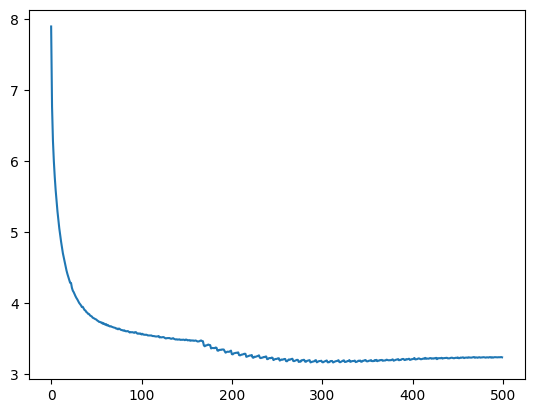

In [42]:
plt.plot(epoch_loss_avg)

In [43]:
input_data = []
for i in range(vocabulary_size):
    input_data.append(i)

In [44]:
input_data = torch.tensor(input_data)

In [45]:
import torch
import torch.nn as nn

# Assume you have a model called `my_model` with an embedding layer
embedding_layer = Transformer_Encoder.embedding  # Get the embedding layer

# Create a sample input data
#input_data = torch.tensor([1, 2, 3, 4, 5])  # example input data

# Pass the input data through the embedding layer
embeddings = embedding_layer(input_data.to(device))

# Now you have the embeddings for the input data
print(embeddings)

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 9.5132e-01,  4.7030e-01, -1.0326e-01,  ..., -2.8336e-01,
          4.4719e-02, -1.9075e-03],
        [-1.1915e+00, -1.8460e+00,  1.7880e+00,  ..., -8.7832e-01,
          3.9218e-01,  1.0437e+00],
        ...,
        [ 8.3466e-01, -1.6825e+00,  3.0467e+00,  ...,  3.1210e+00,
          5.8171e-03, -2.1813e+00],
        [ 4.7648e-01, -1.9847e-01,  4.3738e-01,  ..., -6.8749e-01,
          9.8232e-01,  1.2290e+00],
        [-1.3574e+00,  1.0344e+00,  1.3146e+00,  ..., -2.8620e+00,
          1.2517e+00, -1.2123e+00]], device='cuda:0',
       grad_fn=<EmbeddingBackward0>)


In [46]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 52.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039293 sha256=1c5400a3330c489dde33d9080c8fbb1fdd9d2abf104bdded4f64b04102e97f57
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import hdbscan


embeddings = embeddings.cpu()
# Загрузка эмбеддингов слов
#embeddings = embeddings_np
embeddings_np = embeddings.detach().numpy()

# Сокращение размерности с помощью t-SNE
tsne = TSNE(n_components=3, perplexity=3)
embeddings_tsne = tsne.fit_transform(embeddings_np)



# Кластеризация с помощью HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=6)
clusters = clusterer.fit_predict(embeddings_tsne)

# Визуализация результатов
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=clusters)
plt.colorbar()
plt.show()

In [ ]:
# Получение меток классов
labels = clusterer.labels_

# Создание словаря для сопоставления слов и меток классов
word_clusters = dict(zip(vocabulary, labels))

In [ ]:
word_clusters

In [ ]:
# Создание DataFrame из словаря
df = pd.DataFrame(list(word_clusters.items()), columns=['Слово', 'Метка'])

# Запись DataFrame в Excel
df.to_excel('/content/word_clusters.xlsx', index=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import hdbscan

embeddings = embeddings.cpu()
# Преобразование тензора embeddings в массив numpy
embeddings_np = embeddings.detach().numpy()

# Сокращение размерности с помощью t-SNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)
embeddings_tsne = tsne.fit_transform(embeddings_np)

# Кластеризация с помощью HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=7)
clusters = clusterer.fit_predict(embeddings_tsne)

# Поиск индексов элементов, относящихся к кластеру -1
indices_to_keep = np.where(clusters != -1)[0]

# Фильтрация embeddings_tsne, оставляем только элементы, не относящиеся к кластеру -1
filtered_embeddings_tsne = embeddings_tsne[indices_to_keep]

# Визуализация результатов
plt.figure(figsize=(10, 10))
plt.scatter(filtered_embeddings_tsne[:, 0], filtered_embeddings_tsne[:, 1], c=clusters[indices_to_keep], cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import hdbscan

embeddings = embeddings.cpu()
# Преобразование тензора embeddings в массив numpy
embeddings_np = embeddings.detach().numpy()

# Сокращение размерности с помощью t-SNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)
embeddings_tsne = tsne.fit_transform(embeddings_np)

min_cluster_sizes = range(7, 22)  # Значения min_cluster_size

# Цикл для отображения карт с разными значениями min_cluster_size
for min_cluster_size in min_cluster_sizes:
    # Кластеризация с помощью HDBSCAN
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    clusters = clusterer.fit_predict(embeddings_tsne)

    # Поиск индексов элементов, относящихся к кластеру -1
    indices_to_keep = np.where(clusters != -1)[0]

    # Фильтрация embeddings_tsne, оставляем только элементы, не относящиеся к кластеру -1
    filtered_embeddings_tsne = embeddings_tsne[indices_to_keep]

    # Визуализация результатов
    plt.figure(figsize=(10, 10))
    plt.scatter(filtered_embeddings_tsne[:, 0], filtered_embeddings_tsne[:, 1], c=clusters[indices_to_keep], cmap='rainbow', s=10, alpha=0.8)
    plt.colorbar()
    plt.title(f'min_cluster_size={min_cluster_size}')  # Заголовок с текущим значением min_cluster_size
    plt.show()